# Analyze and Wrangle Data: WeRateDogs

## Table of Contents
- [Introduction](#intro)
- [Data Wrangling](#wrangle)
    - [Data Gathering](#gather)
        - Twitter archive
        - Image prediction
        - Tweet json
    - [Data Assessment](#assess)
        - [Assessment notes](#assessment_points) 
    - [Data Cleaning](#clean)
- [Data Storing, Analysis and Visualization](#explore)
- [Conclusion](#conclusion)
- [References](#ref)

<a id='intro'></a>
## Introduction

Real-world data rarely comes clean. Using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.<br/>
<a id='key'></a>
### Key Points
Key points given by udacity to keep in mind when data wrangling for this project:
* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* Cleaning includes merging individual pieces of data according to the rules of tidy data.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

<a id='gather'></a>
## Data Gathering

In [1]:
import pandas as pd
import numpy as np
import random
import os
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

### 1. Twitter Archive Data
This file is downloaded manually

In [2]:
twitter_archive_data = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### 2. Image Prediction
The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network.
This file should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [4]:
folder='./'
if not os.path.exists(folder):
    os.makedirs(folder_name)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
with open(os.path.join(folder, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [6]:
os.listdir(folder)

['wrangle_report.html',
 'wrangle_act.ipynb',
 'twitter-archive-enhanced.csv',
 '.DS_Store',
 'tweet-json.txt',
 'act_report.html',
 'twitter_archive_master.csv',
 '.ipynb_checkpoints',
 'image-predictions.tsv',
 'wrangle_report.ipynb',
 'act_report.ipynb']

In [7]:
img_predictions_data = pd.read_csv('image-predictions.tsv', sep='\t')

In [8]:
img_predictions_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Tweet JSON
This is the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.<br/>
Note: I had problem, so i'm using the file provided by udacity (Downloaded manually)

In [9]:
# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = twitter_archive_data.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [10]:
tweet_json = pd.read_json('tweet-json.txt', orient = 'records', lines =True)
tweet_json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [11]:
#I will select the columns that we need in our investigation
tweet_json_data= tweet_json[['id','retweet_count','favorite_count']]
#Save to csv file
#tweet_json_data.to_csv('tweet-json.csv', index = False)
#tweet_json_data=pd.read_csv('tweet-json.csv')
tweet_json_data

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


<a id='assess'></a>
## Data Assessment

Here, we are inspecting the datasets for two things: data quality issues (i.e. content issues) and lack of tidiness (i.e. structural issues) to get rid of the dirty and messy data.
In data quality issues we're checking for the dirty data (e.g. inaccurate, corrupted, duplicate and messing data). According to the quality dimentions we need to consider include, **compeleteness**, **validity**, **accuracy**, and **consistency**. In data tidiness issues we're looking for messy data with structural issues. Where each variable forms column, each observation forms a row and each observational unit forms a table [1].

### 1. Twitter archive data

In [12]:
twitter_archive_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
twitter_archive_data.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [14]:
twitter_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
twitter_archive_data.expanded_urls.isna().sum()

59

In [16]:
twitter_archive_data.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

Note: This column's dtype is object. This will be converted to 'category' dtype, this will be useful in the analysis and visualization. 

In [17]:
twitter_archive_data.duplicated().sum()

0

In [18]:
(twitter_archive_data.rating_denominator != 10).value_counts()

False    2333
True       23
Name: rating_denominator, dtype: int64

In [19]:
twitter_archive_data.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In this rating system it is allowed to have numerator over 10. However, There're huge values that will affect the statistical analysis results.

In [20]:
cond = (twitter_archive_data.rating_denominator == 10) & (twitter_archive_data.rating_numerator >= 20) & twitter_archive_data['in_reply_to_status_id'].isna() & twitter_archive_data['retweeted_status_id'].isna()
twitter_archive_data[cond][['text', 'tweet_id', 'rating_numerator', 'rating_denominator','retweeted_status_id']]

,text,tweet_id,rating_numerator,rating_denominator,retweeted_status_id
695,"This is Logan, the Chow who lived. He solemnly...",786709082849828864,75,10,NaN
763,This is Sophie. She's a Jubilant Bush Pupper. ...,778027034220126208,27,10,NaN
979,This is Atticus. He's quite simply America af....,749981277374128128,1776,10,NaN
1712,Here we have uncovered an entire battalion of ...,680494726643068929,26,10,NaN
2074,After so many requests... here you go.\n\nGood...,670842764863651840,420,10,NaN


**Notice**: record 979 has a huge number of rating 1776, also record 2074 the numerator is 420!

In [21]:
twitter_archive_data.rating_denominator.value_counts().value_counts()

1       13
3        2
2        2
2333     1
Name: rating_denominator, dtype: int64

**We notice from above that**
- Not all the rows are about the tweets only, it incluedes data about retweets and replies 
    - 79 records of `in_reply_to_status_id`,`in_reply_to_user_id `.
    - 188 records of`retweeted_status_id`,`retweeted_status_user_id`, and`retweeted_status_timestamp`.
    - The retweet id and reply to ids are in float format, the retweet timestamp are in string format (object).
- Timestamp is in string format.
- Missing values in `expanded_url` (in 59 records)
- The values 'a' and 'None' in the `name` column
- The `rating_numerator` are more than 10 (This rating system is allowed in WeRateDogs) however, there are huge values that affect the statistics.
- There are columns for each dog stage according to Dogtionary.
- All the `rating_denominator` supposed to be equal to 10

In [22]:
twitter_archive_data.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [23]:
wrong_names=twitter_archive_data[twitter_archive_data['name'].str.contains('^[a-z]', regex = True)].name.unique()
wrong_names

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [24]:
# arr=wrong_names.tolist()
# arr
twitter_archive_data.name.str.contains('^[a-z]', regex = True).value_counts()

False    2247
True      109
Name: name, dtype: int64

**Notice:**<br/>
There are 109 records that hold names start with lowercase letters and not true names. This include `a, an, his, the, very, light, officially, actually, by, old, infuriating, all, getting, this, unacceptable, my, just, and, mad, one, not, quite, such, space, life.`

### 2. Image Predictions

In [25]:
img_predictions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
img_predictions_data

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [27]:
img_predictions_data.tweet_id.duplicated().sum()

0

In [28]:
img_predictions_data

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


I noticed here that p1 has the highest confidence.

In [29]:
cond = (img_predictions_data.p1_conf > img_predictions_data.p2_conf) & (img_predictions_data.p1_conf > img_predictions_data.p3_conf)
img_predictions_data[cond]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


From above we notice the following 
- Quality issues:
    - The image `jpg_url` is not the same as the expanded url in the 
    - The number of records 2075. The image prediction records are missing for some of the twitter_archive_data (I'm assuming it is because of the tweets beyond 1 aug 2017 [key points](#key)).
- Tidiness issues:
    - The columns of predictions `p1`,`p2`,`p3` the prediction algorithms and  columns in `p1_conf`, `p2_conf`, `p3_conf` are for prediction confidence. Also, the columns `p1_dog`,`p2_dog`,`p3_dog` if dog or not.
    - The image predections will be joined with tweet archive on the `breed`, `confidence`, `is_dog`,`jpg_url`

### 3. Tweet JSON 

In [30]:
tweet_json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [31]:
tweet_json_data.duplicated().sum()

0

From above we notice the following
- Quality issues:
    - There are 2354 records. The 2 records of tweet data about the twitter archive data are missing.
- Tidiness issues:
    - Need to be merged with the tweets archive data set. 
    - The name of the column `id`

<a id='assessment_points'></a>
    
### Assessment Notes 
#### Quality issues
- **Twitter Archive Data**
    - Some of the tweets are re-tweeted or a reply tweets, not original rating tweets. (according to the [key points](#key), we only need the original rating tweets).
        - There are 79 records of `in_reply_to_status_id`,`in_reply_to_user_id ` 
        - And 188 records of`retweeted_status_id`,`retweeted_status_user_id`, and `retweeted_status_timestamp`.
        - The columns `in_reply_to_status_id`,`in_reply_to_user_id ` and `retweeted_status_id`,`retweeted_status_user_id` are in float format.
        - `retweeted_status_timestamp` is in object - string format.
    - The `timestamp` column data type is object it should be in timestamp format.
    - Missing values in `expanded_urls`, 59 tweet without images.
    - The `rating_numerator` has values more than denominator 10 (In this rating system it doesn't need to be cleaned [see key points](#key)). However, there are some records that have a higher values.
    - The `rating_denominator` has values more or less than 10, the accurate rating denominator should be out of 10.
    - The `name` column has values that start with lower case letters and probbaly not true names of pet
        - There are 109 records that include `a, an, his, the, very, light, officially, actually, by, old, infuriating, all, getting, this, unacceptable, my, just, and, mad, one, not, quite, such, space, life.`
    - The `source` column datatype (it should be category).
- **Image Predictions Data**
    - The number of records 2075. The image prediction records are missing some of the twitter_archive data (I'm assuming it is because of the tweets beyond 1 aug 2017 [key points](#key)).
- **Tweet JSON Data**
    - There are 2354 records. The records of tweet data associated to the twitter archive data are missing.

#### Tidiness issues
- **Twitter Archive Data**
    - There're columns for each dog stage `doggo`,`floofer`,`pupper`,`puppo`.
    - Replies and retweets are not original tweets we will remove the unnecessary columns related to retweets and reply.
    - This should be merge with dog image prediction, and the number of retweets and favourite. 
- **Image Predictions Data**
    - The columns of predictions `p1`,`p2`,`p3` the prediction algorithms and  columns in `p1_conf`, `p2_conf`, `p3_conf` are for prediction confidence. Also, the columns `p1_dog`,`p2_dog`,`p3_dog` if dog or not.
    - The image predections will be joined with tweet archive on the `jpg_url`, `breed`, `confidence`, `is_dog`
- **Tweet JSON Data**
    - The name of the column `id`.
    - Need to be merged with the tweets_archive_data set. 

<a id='clean'></a>
## Data Cleaning

After identifying the quality and tidiness issues we will clean the datasets according to the assessment points in [here](#assessment_points). The programmatic data cleaning process followed in this section is:<br/>
**Define**: convert our assessments into defined cleaning tasks. These definitions also serve as an instruction list so others (or yourself in the future) can look at your work and reproduce it.<br/>
**Code**: convert those definitions to code and run that code.<br/>
**Test**: test your dataset, visually or with code, to make sure your cleaning operations worked.<br/> each issue will be defined, coded and tested. 

### 1. Twitter Archive Data

In [32]:
archive_clean_data = twitter_archive_data.copy()

**Quality issue 1**: Timestamps datatyp is object (String format).
<br/>
**Define**
> Convert the `timestamps` from object to datetime format


**Code**

In [33]:
archive_clean_data.timestamp = pd.to_datetime(archive_clean_data.timestamp)

**Test**

In [34]:
archive_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

**Quality issue 2**: Replies are not original rating tweet: There are 78 records of replies.
<br/>
**Define**
> Drop the records that involves retweets and replies. First lets check on these records.


**Code**

In [35]:
replies=archive_clean_data[archive_clean_data.in_reply_to_status_id.notnull()]
replies

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [36]:
archive_clean_data.drop(replies.index, inplace = True)

**Test**

In [37]:
archive_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2278 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2278 non-null   datetime64[ns, UTC]
 4   source                      2278 non-null   object             
 5   text                        2278 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2274 non-null   object             
 10  rating_numerator            2278 non-null   int64           

**Quality issue 3**: There are 188 recods of retweets that are not original rating tweets. <br/>

**Define**
> Drop the records of the retweets data.

**Code**

In [38]:
retweets = archive_clean_data[archive_clean_data.retweeted_status_id.notnull()]

In [39]:
archive_clean_data.drop(retweets.index, inplace = True)

**Test**

In [40]:
archive_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

**Note**:
There is a tidiness issue: the columns `in_reply_to_status_id`,`in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`,`retweeted_status_timestamp` have null values and need to be removed.  <br/> There's still the data type of these columns but since we will not need them no need to convert.

**Tidiness issue** 1: retweets and replies columns have NaN, not useful from now on.<br/>
**Define**
> drop the columns that are not needed anymore. `in_reply_to_status_id`,`in_reply_to_user_id`, `retweeted_status_id`,`retweeted_status_user_id`,`retweeted_status_timestamp`. 

<br/>

**Code**

In [41]:
archive_clean_data.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

**Test**

In [42]:
archive_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

**Other quality issues solved:**
- The columns in_reply_to_status_id,in_reply_to_user_id and retweeted_status_id,retweeted_status_user_id were in float format.
- retweeted_status_timestamp was in object - string format.

**Quality issue 4**: Missing value in `expanded_urls`.
<br/>
**Define**
> Drop the rows that have missing values (missing images)


**Code**

In [43]:
archive_clean_data[archive_clean_data.expanded_urls.isna()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,2017-02-05 21:56:51+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,12,10,None,None,None,None,None
707,785515384317313025,2016-10-10 16:20:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,10,10,None,None,None,None,None
1445,696518437233913856,2016-02-08 02:18:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,10,10,None,None,None,pupper,None


In [44]:
archive_clean_data.drop(archive_clean_data[archive_clean_data.expanded_urls.isna()].index, inplace=True)

**Test**

In [45]:
archive_clean_data.expanded_urls.isna().sum()

0

In [46]:
archive_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   doggo               2094 non-null   object             
 9   floofer             2094 non-null   object             
 10  pupper              2094 non-null   object             
 11  puppo               2094 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

**Quality issue 5**: The `name` column has values that start with lower case letters and probbaly not true names of pets. <br/>
There are 109 records that include: a, an, his, the, very, light, officially, actually, by, old, infuriating, all, getting, this, unacceptable, my, just, and, mad, one, not, quite, such, space, life.
<br/>
**Define**
> Instead of dropping the rows, we will replace the name values that start with lower case with 'None'.

**Code**

In [47]:
archive_clean_data.loc[archive_clean_data.name.str.contains('^[a-z]', regex = True),'name']= 'None'
archive_clean_data

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,None,None,None


**Test**

In [48]:
archive_clean_data.name.str.contains('^[a-z]').sum()

0

In [49]:
archive_clean_data.name.str.contains('None').sum()

704

In [50]:
archive_clean_data.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

**Quality issue 6**: The `rating_denominator` column has values not equal to 10.
<br/>
**Define**
> - Check where the rating_denominator != 10. 
- Then, we will drop the data with rating_denominator !=10. We need to do more investigation first.
**Code**

In [51]:
denominator=archive_clean_data[archive_clean_data.rating_denominator != 10][['tweet_id','text','rating_denominator','rating_numerator']]
denominator

,tweet_id,text,rating_denominator,rating_numerator
433,820690176645140481,The floofs have been released I repeat the flo...,70,84
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,7,24
902,758467244762497024,Why does this never happen at my front door......,150,165
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",11,9
1120,731156023742988288,Say hello to this unbelievably well behaved sq...,170,204
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,20,4
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,90,99
1254,710658690886586372,Here's a brigade of puppers. All look very pre...,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro...",50,45


We notice here the errors in the `text` column values, where the tweet text mentioned a 50/50 which is a puppy hair style, 24/7 (24 hrs/7 days), 4/20 (Date), 9/11 a date where a terrorist attack had happend, and 3 1/2 legged dog as in disabled puppy.

In [52]:
denominator['text'].unique()

array(['The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
       'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
       'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
       'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
       'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
       'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
       'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq',
       "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1",
       "Here's a brigade of pup

There are some errors in data entries, it will be handeled manualy<br/>
1- Tweet id 740373189193256964 from 9/11 to 14/10 <br/>
2- Tweet id 722974582966214656 from 4/20 to 13/10 <br/>
3- Tweet id 716439118184652801 from 50/50 to 11/10 <br/>
4- Tweet id 682962037429899265 from 7/11 to 10/10 <br/>
5- Tweet id 666287406224695296 from 1/2 to 9/10 <br/>

**Quality issue 6-1**: The rating_denominator column has values not equal to 10. <br/>
**Define**
> Fix the entry error manually

**Code**

In [53]:
row = archive_clean_data[archive_clean_data['tweet_id'] == 740373189193256964]#from 9/11 to 14/10
archive_clean_data.loc[row.index,'rating_numerator']=14
archive_clean_data.loc[row.index,'rating_denominator']=10
row

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None


In [54]:
row2 = archive_clean_data[archive_clean_data['tweet_id']== 722974582966214656]#from 4/20 to 13/10
archive_clean_data.loc[row2.index,'rating_numerator']=13
archive_clean_data.loc[row2.index,'rating_denominator']=10
row2

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1165,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None


In [55]:
row3 = archive_clean_data[archive_clean_data['tweet_id'] == 716439118184652801] #from 50/50 to 11/10
archive_clean_data.loc[row3.index,'rating_numerator'] = 11
archive_clean_data.loc[row3.index,'rating_denominator'] = 10
row3

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [56]:
row4 = archive_clean_data[archive_clean_data['tweet_id'] == 682962037429899265] #from 7/11 to 10/10
archive_clean_data.loc[row4.index,'rating_numerator'] = 10
archive_clean_data.loc[row4.index,'rating_denominator'] = 10
row4

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1662,682962037429899265,2016-01-01 16:30:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


In [57]:
row5 = archive_clean_data[archive_clean_data['tweet_id'] == 666287406224695296] #from 1/2 to 9/10
archive_clean_data.loc[row5.index,'rating_numerator'] = 9
archive_clean_data.loc[row5.index,'rating_denominator'] = 10
row5

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,None,None,None,None,None


**Test**

In [58]:
archive_clean_data.loc[[1068, 1165, 1202, 1662, 2335],['tweet_id','rating_numerator','rating_denominator']]

,tweet_id,rating_numerator,rating_denominator
1068,740373189193256964,14,10
1165,722974582966214656,13,10
1202,716439118184652801,11,10
1662,682962037429899265,10,10
2335,666287406224695296,9,10


**Quality issue 6-2**: The `rating_denominator` column has values not equal to 10.
<br/>
**Define**
> Drop the records with rating_denominator != 10

**Code**

In [59]:
deno=archive_clean_data[archive_clean_data.rating_denominator != 10]

In [60]:
archive_clean_data.drop(deno.index, inplace = True)

**Test**

In [61]:
(archive_clean_data.rating_denominator != 10).sum()

0

In [62]:
archive_clean_data.rating_denominator.value_counts()

10    2082
Name: rating_denominator, dtype: int64

In [63]:
archive_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2082 non-null   int64              
 1   timestamp           2082 non-null   datetime64[ns, UTC]
 2   source              2082 non-null   object             
 3   text                2082 non-null   object             
 4   expanded_urls       2082 non-null   object             
 5   rating_numerator    2082 non-null   int64              
 6   rating_denominator  2082 non-null   int64              
 7   name                2082 non-null   object             
 8   doggo               2082 non-null   object             
 9   floofer             2082 non-null   object             
 10  pupper              2082 non-null   object             
 11  puppo               2082 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

**Tidiness issue 2:** All denominator column values are equal 10.<br/>
**Define**
> * Drop the unused column.

**Code**

In [64]:
(archive_clean_data.rating_denominator != 10).sum()

0

In [65]:
archive_clean_data.drop('rating_denominator', axis=1, inplace=True)
archive_clean_data.rename(columns={'rating_numerator':'rating'},inplace=True)

**Test**

In [66]:
archive_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2082 non-null   int64              
 1   timestamp      2082 non-null   datetime64[ns, UTC]
 2   source         2082 non-null   object             
 3   text           2082 non-null   object             
 4   expanded_urls  2082 non-null   object             
 5   rating         2082 non-null   int64              
 6   name           2082 non-null   object             
 7   doggo          2082 non-null   object             
 8   floofer        2082 non-null   object             
 9   pupper         2082 non-null   object             
 10  puppo          2082 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 195.2+ KB


**Quality issue 7**: The `rating_numerator`, now `rating`, column has huge values larger than 10. (This rating system is okay in WeRateDogs. However, there are huge value such as, 75, 27, 1776, 26, and 420).<br/>
**Define**
> Drop the records with huge rating_numerator values

**Code**

In [67]:
numerator = archive_clean_data[archive_clean_data.rating > 20]

In [68]:
archive_clean_data.drop(numerator.index, inplace=True)

**Test**

In [69]:
(archive_clean_data.rating > 20).sum()

0

**Tidiness issue 3-1**: There're columns for each dog stage variable `doggo`,`floofer`,`pupper`,`puppo`.<br/>
**Define**
> * Gather the four columns under one column, named `stage`. 
* Convert stage form object type to 'category', so it will not cause quality issue.
[[1]](https://stackoverflow.com/questions/45662403/melting-pandas-data-frame-with-multiple-variable-names-and-multiple-value-names)
* Drop the uneeded columns.

**Code**

In [70]:
#by adding the stage columns, we can see how many are 'none' and how many stages are set
archive_clean_data['stage'] = (archive_clean_data.floofer + archive_clean_data.doggo + archive_clean_data.puppo + archive_clean_data.pupper )

# have a look at what we have before we continue...
archive_clean_data.stage.value_counts()

NoneNoneNoneNone        1743
NoneNoneNonepupper       219
NonedoggoNoneNone         72
NoneNonepuppoNone         23
flooferNoneNoneNone        9
NonedoggoNonepupper        9
NonedoggopuppoNone         1
flooferdoggoNoneNone       1
Name: stage, dtype: int64

In [71]:
#Change the stages
archive_clean_data.loc[archive_clean_data.stage == 'NoneNoneNoneNone', 'stage'] = 'None'
archive_clean_data.loc[archive_clean_data.stage == 'NoneNoneNonepupper', 'stage'] = 'pupper'
archive_clean_data.loc[archive_clean_data.stage == 'NonedoggoNoneNone', 'stage'] = 'doggo'
archive_clean_data.loc[archive_clean_data.stage == 'NoneNonepuppoNone', 'stage'] = 'puppo'
archive_clean_data.loc[archive_clean_data.stage == 'flooferNoneNoneNone', 'stage'] = 'floofer'
#The rest have multi stages it will be cleaned according to dog dictionary where doggo > puppo > pupper and there's a floofer which could be any dog.
archive_clean_data.loc[archive_clean_data.stage == 'NonedoggoNonepupper', 'stage'] = 'doggo'
archive_clean_data.loc[archive_clean_data.stage == 'NonedoggopuppoNone', 'stage'] = 'doggo'
archive_clean_data.loc[archive_clean_data.stage == 'flooferdoggoNoneNone', 'stage'] = 'floofer' #bc it's more general category

In [72]:
archive_clean_data.stage = archive_clean_data.stage.astype('category')

**Test**

In [73]:
archive_clean_data.stage.unique()

[None, doggo, puppo, pupper, floofer]
Categories (5, object): [None, doggo, puppo, pupper, floofer]

In [74]:
archive_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2077 non-null   int64              
 1   timestamp      2077 non-null   datetime64[ns, UTC]
 2   source         2077 non-null   object             
 3   text           2077 non-null   object             
 4   expanded_urls  2077 non-null   object             
 5   rating         2077 non-null   int64              
 6   name           2077 non-null   object             
 7   doggo          2077 non-null   object             
 8   floofer        2077 non-null   object             
 9   pupper         2077 non-null   object             
 10  puppo          2077 non-null   object             
 11  stage          2077 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 196.9+ KB


**Tidiness issue 3-2**: There're columns for each dog stage `doggo`,`floofer`,`pupper`,`puppo`.<br/>
**Define**
> * We gathered the four columns under one column, named `stage` and dtype 'category'. 
* Drop the columns we will not use.

**Code**

In [75]:
archive_clean_data.drop(['doggo','floofer','pupper','puppo'], axis = 1, inplace = True)

**Test**

In [76]:
archive_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2077 non-null   int64              
 1   timestamp      2077 non-null   datetime64[ns, UTC]
 2   source         2077 non-null   object             
 3   text           2077 non-null   object             
 4   expanded_urls  2077 non-null   object             
 5   rating         2077 non-null   int64              
 6   name           2077 non-null   object             
 7   stage          2077 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 132.0+ KB


In [77]:
 archive_clean_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None


I just noticed that the source column values are in HTML tags

**Quality issue 8**: The `source` column values are in HTML tags.<br/>
**Define**
> * Extract the source text from the html tag
* Change the data type to category. This will be useful in the analysis.

**Code**

In [78]:
archive_clean_data.source = archive_clean_data.source.str.extract('<a.+>(.+)</a>$')

In [79]:
 archive_clean_data.source = archive_clean_data.source.astype('category')

**Test**

In [80]:
archive_clean_data.source.value_counts()

Twitter for iPhone     1946
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                10
Name: source, dtype: int64

In [81]:
 archive_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2077 non-null   int64              
 1   timestamp      2077 non-null   datetime64[ns, UTC]
 2   source         2077 non-null   category           
 3   text           2077 non-null   object             
 4   expanded_urls  2077 non-null   object             
 5   rating         2077 non-null   int64              
 6   name           2077 non-null   object             
 7   stage          2077 non-null   category           
dtypes: category(2), datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 118.0+ KB


**Tideness issue 4**: The `image predictions` and the additional data from `JSON data`<br/>
**Define**
> * Join/merge the datasets column.
* Add the predicted `breed`, prediction `confidence` from the image predictions data.
* Add `retweet_count`, `favorite_count` of tweets from the JSON data

**Code**

### 2. Image Predictions Data

In [82]:
predictions_clean_data = img_predictions_data.copy()

In [83]:
predictions_clean_data.axes

[RangeIndex(start=0, stop=2075, step=1),
 Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
        'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
       dtype='object')]

**Tidiness issue 3**: The columns of predictions p1,p2,p3 the prediction algorithms and columns in p1_conf, p2_conf, p3_conf are for prediction confidence. Also, the columns p1_dog,p2_dog,p3_dog if dog or not.<br/>
**Define**
> * Rename columns to be more clear 


**Code**

In [84]:
columns = {'img_num':'image_number', 'p1':'prediction1', 'p2':'prediction2','p3':'prediction3',
           'p1_conf':'prediction1_confidence', 'p2_conf':'prediction2_confidence', 'p3_conf':'prediction3_confidence',
          'p1_dog':'prediction1_isdog', 'p2_dog': 'prediction2_isdog', 'p3_dog':'prediction3_isdog'}
predictions_clean_data.rename(columns=columns, inplace=True)

**Test**

In [85]:
predictions_clean_data.columns

Index(['tweet_id', 'jpg_url', 'image_number', 'prediction1',
       'prediction1_confidence', 'prediction1_isdog', 'prediction2',
       'prediction2_confidence', 'prediction2_isdog', 'prediction3',
       'prediction3_confidence', 'prediction3_isdog'],
      dtype='object')

**Tidiness issue 5**: Prediction join the twitter archive on the 'tweet_id'. The prediction `breed` and `confidence` associated to each tweet are needed.<br/>
**Define**
> * Let's merge the image predections records to twitter archive and perform join 
    * Copy the columns `prediction1`, `prediction_confidence` to `breed_prediction`,`confidence`. Since we noticed in the assesment the first prediction has the larger confidence than p2 and p3.
    * Do inner join on `tweet_id` to merge with twitter archive. 
        * The image url (.jpg) is different than extended url so we will use it.
        * **Quality issue**:  There will be still a missing image prediction records related to the tweets in twitter archive. (assuming it is because there are no records beyond 1 Aug 2017 [key points](#key)). This will be solved using inner join. <br/>
    * Drop `breed`,`confidence` from image predection. 


**Code**

In [86]:
predictions_clean_data['breed_prediction']= predictions_clean_data['prediction1']
predictions_clean_data['confidence']= (predictions_clean_data['prediction1_confidence']*100).astype(int) #confidence percentage
predictions_clean_data['is_dog']= predictions_clean_data['prediction1_isdog']
predictions_clean_data.head(1)

,tweet_id,jpg_url,image_number,prediction1,prediction1_confidence,prediction1_isdog,prediction2,prediction2_confidence,prediction2_isdog,prediction3,prediction3_confidence,prediction3_isdog,breed_prediction,confidence,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,46,True


In [87]:
#merge archive_clean_data and predictions_clean_data using inner join
archive_clean_data = pd.merge(archive_clean_data, predictions_clean_data[['tweet_id','breed_prediction','confidence','is_dog','jpg_url']],
                         on = 'tweet_id', how = 'inner')

In [88]:
#Drop the copied columns
predictions_clean_data.drop(['breed_prediction', 'confidence'], axis = 1, inplace = True)

**Test**

In [89]:
predictions_clean_data.head()

,tweet_id,jpg_url,image_number,prediction1,prediction1_confidence,prediction1_isdog,prediction2,prediction2_confidence,prediction2_isdog,prediction3,prediction3_confidence,prediction3_isdog,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,True


In [90]:
archive_clean_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating,name,stage,breed_prediction,confidence,is_dog,jpg_url
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,orange,9,False,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,Chihuahua,32,True,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,Chihuahua,71,True,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,paper_towel,17,False,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,basset,55,True,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


In [91]:
archive_clean_data.info(), predictions_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 1953
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1954 non-null   int64              
 1   timestamp         1954 non-null   datetime64[ns, UTC]
 2   source            1954 non-null   category           
 3   text              1954 non-null   object             
 4   expanded_urls     1954 non-null   object             
 5   rating            1954 non-null   int64              
 6   name              1954 non-null   object             
 7   stage             1954 non-null   category           
 8   breed_prediction  1954 non-null   object             
 9   confidence        1954 non-null   int64              
 10  is_dog            1954 non-null   bool               
 11  jpg_url           1954 non-null   object             
dtypes: bool(1), category(2), datetime64[ns, UTC](1), int64(3), obj

(None, None)

### 3. JSON Data

In [92]:
#make a copy to work on for clean json data
json_clean_data = tweet_json_data.copy()

**Tidiness issue 6**: The `id` column.<br/>
**Define**
> * Rename `id` cloumn to `tweet_id`.

**Code**

In [93]:
json_clean_data.rename(columns = {'id':'tweet_id'}, inplace=True)

**Test**

In [94]:
json_clean_data.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [95]:
json_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


**Tidiness issue 7**: Join with twitter archive. <br/>
**Define**
> * Merge the retweet_count and favorite_count with twitter archive by performing inner join on `tweet_id`.
    * **Qulity issue 9**: Missing records related to the tweets in the twitter archive. (This will be solved with the inner join)<br/>

**Code**

In [96]:
archive_clean_data = pd.merge(archive_clean_data, json_clean_data[['tweet_id','retweet_count','favorite_count']],
                         on = 'tweet_id', how = 'inner')

**Test**

In [97]:
archive_clean_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating,name,stage,breed_prediction,confidence,is_dog,jpg_url,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,orange,9,False,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,Chihuahua,32,True,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,Chihuahua,71,True,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,paper_towel,17,False,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,basset,55,True,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,9774,41048


In [98]:
archive_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 1953
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1954 non-null   int64              
 1   timestamp         1954 non-null   datetime64[ns, UTC]
 2   source            1954 non-null   category           
 3   text              1954 non-null   object             
 4   expanded_urls     1954 non-null   object             
 5   rating            1954 non-null   int64              
 6   name              1954 non-null   object             
 7   stage             1954 non-null   category           
 8   breed_prediction  1954 non-null   object             
 9   confidence        1954 non-null   int64              
 10  is_dog            1954 non-null   bool               
 11  jpg_url           1954 non-null   object             
 12  retweet_count     1954 non-null   int64              
 13  fav

<a id='explore'></a>
## Data storing, analysis and visualization

### Storing Data

In [99]:
archive_clean_data.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

### Analysis and Visualization

In this section we will explore the dataset statistics, perform some analysis along with visualization to conclude our insights and findings.

In [100]:
df=archive_clean_data.copy()

In [101]:
df.describe()

,tweet_id,rating,confidence,retweet_count,favorite_count
count,1.954000e+03,1954.00000,1954.000000,1954.000000,1954.000000
mean,7.361198e+17,10.54043,58.898158,2790.850051,8976.985670
std,6.767301e+16,2.17434,27.209573,4715.130613,12310.118766
min,6.660209e+17,0.00000,4.000000,16.000000,81.000000
25%,6.758214e+17,10.00000,36.000000,623.250000,1960.500000
50%,7.087745e+17,11.00000,58.000000,1363.000000,4145.500000
75%,7.883537e+17,12.00000,84.000000,3243.000000,11443.000000
max,8.924206e+17,14.00000,100.000000,79515.000000,132810.000000


The average rating in this dataset is 10.54!

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 1953
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1954 non-null   int64              
 1   timestamp         1954 non-null   datetime64[ns, UTC]
 2   source            1954 non-null   category           
 3   text              1954 non-null   object             
 4   expanded_urls     1954 non-null   object             
 5   rating            1954 non-null   int64              
 6   name              1954 non-null   object             
 7   stage             1954 non-null   category           
 8   breed_prediction  1954 non-null   object             
 9   confidence        1954 non-null   int64              
 10  is_dog            1954 non-null   bool               
 11  jpg_url           1954 non-null   object             
 12  retweet_count     1954 non-null   int64              
 13  fav

#### The number of tweets over the years in WeRateDogs.

In [103]:
tweets_y=df['timestamp'].apply(lambda x: x.strftime('%Y')).value_counts().sort_index()
tweets_ym=df['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()
tweets_ym

2015-11    294
2015-12    357
2016-01    165
2016-02    106
2016-03    115
2016-04     54
2016-05     55
2016-06     79
2016-07     86
2016-08     59
2016-09     62
2016-10     64
2016-11     52
2016-12     53
2017-01     65
2017-02     64
2017-03     47
2017-04     40
2017-05     42
2017-06     44
2017-07     49
2017-08      2
Name: timestamp, dtype: int64

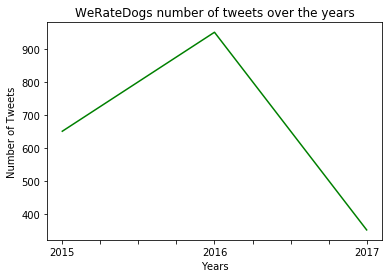

In [104]:
p=tweets_y.plot(title='WeRateDogs number of tweets over the years',color='green')
p.set_xlabel("Years")
p.set_ylabel("Number of Tweets")
plt.show()

Text(0, 0.5, 'Number of Tweets')

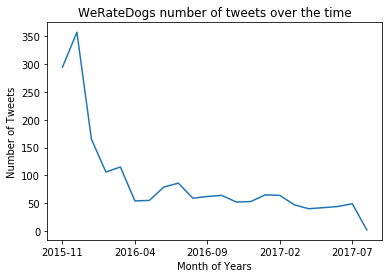

In [105]:
p=tweets_ym.plot(title='WeRateDogs number of tweets over the time')
p.set_xlabel("Month of Years")
p.set_ylabel("Number of Tweets")

In the last month of 2015 was the peak of tweets number 300 tweets/month and then the number has drastically dropped in 2016 to reach less . 

#### Top twitter sources to tweet from  [*](#ref)

In [106]:
top_src=(df.source.value_counts()/df.shape[0])*100 #percentage
top_src=top_src[top_src!=0]
top_src

Twitter for iPhone    98.055271
Twitter Web Client     1.432958
TweetDeck              0.511771
Name: source, dtype: float64

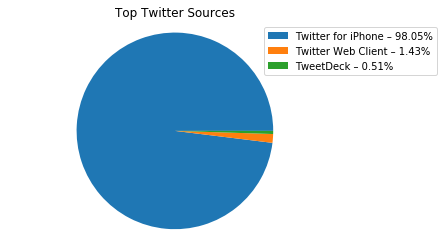

In [107]:
# pie chart 
labels=['Twitter for iPhone – 98.05%','Twitter Web Client – 1.43%','TweetDeck – 0.51%']
plt.pie(top_src, startangle=360);
plt.axis('equal')
plt.title('Top Twitter Sources')
plt.legend(labels, bbox_to_anchor=(1.3,1.0), loc="upper right")
plt.show()

98.05% of the tweets were from `Twitter for iPhone` source.

#### Rating Distribution

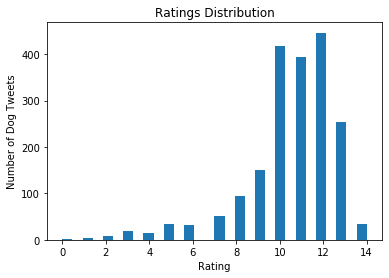

In [108]:
df.rating.plot(kind = 'hist', bins = 30)
plt.ylabel('Number of Dog Tweets')
plt.xlabel('Rating')
plt.title('Ratings Distribution')
plt.show()

Most rated dogs 12/10 by over 400 tweets. 10 and 11 are close after.

#### Common Names

In [109]:
common_names=df.name.value_counts()
common_names

None       609
Charlie     11
Oliver      10
Cooper      10
Lucy        10
          ... 
Ulysses      1
Ed           1
Chase        1
Rhino        1
Comet        1
Name: name, Length: 912, dtype: int64

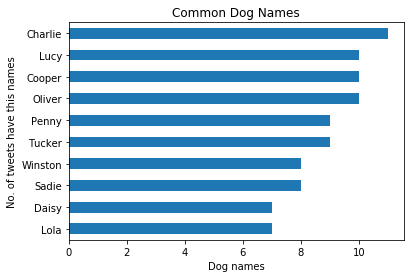

In [110]:
common_names=common_names[1:11].sort_values()
p=common_names.plot.barh(title='Common Dog Names');
p.set_xlabel("Dog names")
p.set_ylabel("No. of tweets have this names")
plt.show()

Charlie is one of the most common dog name. Followed by Cooper, Lucy  and Oliver.

In [111]:
common_stage=df.stage.value_counts()/df.shape[0]*100
common_stage

None       84.544524
pupper     10.235415
doggo       3.684749
puppo       1.125896
floofer     0.409417
Name: stage, dtype: float64

#### Common Dog Stages

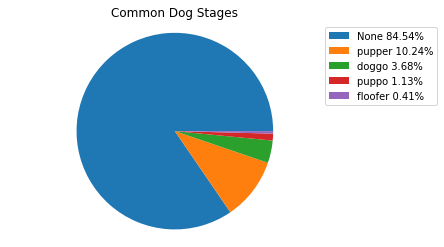

In [112]:
labels = ['None 84.54%','pupper 10.24%','doggo 3.68%','puppo 1.13%','floofer 0.41%']
plt.pie(common_stage);
plt.axis('equal')
plt.title('Common Dog Stages')
plt.legend(labels, bbox_to_anchor=(1.3,1.0), loc="upper right")
plt.show()

We notice that in 10.25% of the tweets the dogs were in the pupper stage.

In [113]:
common_breed=df[(df.breed_prediction!='None') & (df.is_dog==True)]
common_breed=common_breed.breed_prediction.value_counts()
common_breed

golden_retriever      135
Labrador_retriever     91
Pembroke               88
Chihuahua              78
pug                    54
                     ... 
groenendael             1
EntleBucher             1
Japanese_spaniel        1
standard_schnauzer      1
Scotch_terrier          1
Name: breed_prediction, Length: 110, dtype: int64

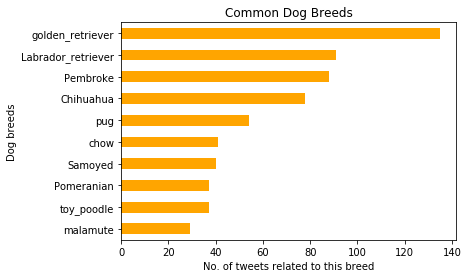

In [114]:
common_breed=common_breed[0:10].sort_values(ascending=True)
p=common_breed.plot.barh(title='Common Dog Breeds',color='orange');
p.set_ylabel('Dog breeds')
p.set_xlabel('No. of tweets related to this breed')
plt.show()

The most common breed is golden retriever with over 130 tweets. 

#### Top Retweeted Tweet in WeRateDogs [*](#ref)

In [115]:
most_rted=df.sort_values('retweet_count',ascending=False).head(1)
id=most_rted.tweet_id
tweet=most_rted.text.values
img=df[df.tweet_id.values == id.values].jpg_url.values

In [116]:
print("Top retweeted tweet: \n" + tweet[0])
Image(url=img[0])

Top retweeted tweet: 
Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4


#### Top Favored Tweet in WeRateDogs

In [117]:
most_fav=df.sort_values('favorite_count',ascending=False).head(1)
id=most_fav.tweet_id
tweet=most_fav.text.values
img=df[df.tweet_id.values == id.values].jpg_url.values

In [118]:
print("Top favourite tweet: \n" + tweet[0])
Image(url=img[0])

Top favourite tweet: 
Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc


#### Top Favorite Dog Breed

In [119]:
faved_breed = df[(df.breed_prediction != 'None')&(df.is_dog == True)].groupby(['breed_prediction'])
faved_breed = faved_breed.favorite_count.sum().sort_values(ascending=False)
faved_breed = faved_breed.head(10)
faved_breed

breed_prediction
golden_retriever      1684486
Labrador_retriever    1104820
Pembroke               994755
Chihuahua              673526
Samoyed                542991
French_bulldog         465738
chow                   404241
pug                    320223
cocker_spaniel         315825
Pomeranian             278818
Name: favorite_count, dtype: int64

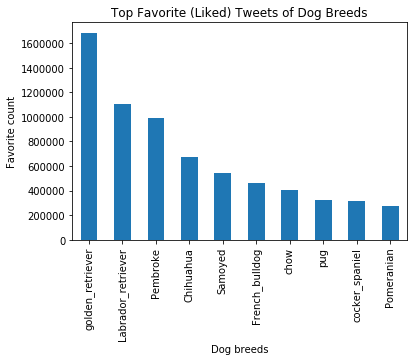

In [120]:
f=faved_breed.plot.bar(title='Top Favorite (Liked) Tweets of Dog Breeds');
f.set_xlabel('Dog breeds')
f.set_ylabel('Favorite count')
plt.show()

The top favorite tweet breed is Golden retriever with 1.6M likes! Followed by Labrador retriever with 1.4M likes and Pembroke with 1.2M likes.

#### Top Retweeted Dog Breed

In [121]:
rted_breed = df[(df.breed_prediction != 'None')&(df.is_dog == True)].groupby(['breed_prediction'])
rted_breed = rted_breed.retweet_count.sum().sort_values(ascending=False)
rted_breed = rted_breed.head(10)
rted_breed

breed_prediction
golden_retriever      498741
Labrador_retriever    359558
Pembroke              280367
Chihuahua             219610
Samoyed               184922
French_bulldog        121782
chow                  116361
cocker_spaniel        100561
Pomeranian             99449
pug                    99182
Name: retweet_count, dtype: int64

Text(0, 0.5, 'Retweet count')

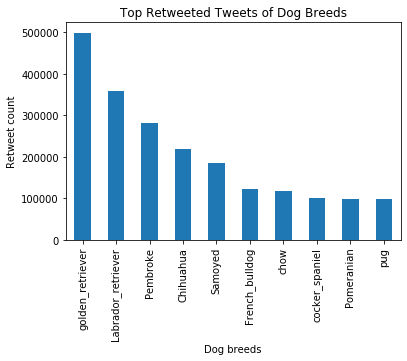

In [122]:
p=rted_breed.plot.bar(title='Top Retweeted Tweets of Dog Breeds');
p.set_xlabel('Dog breeds')
p.set_ylabel('Retweet count')

The top retweeted breed is Golden retriever with 500K of RTs! Followed by Labrador retriever with 350K RTs and Pembroke with 275K RTs.

<a id='conclusion'></a>
## Conclusion 
In this project we gathered Real-world data from a variety of sources and in a variety of formats. The first file is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs, an additional data from the Twitter API (JSON file) and finally the image predictions file.  The quality and tidiness issues are assessed, then every issue is cleaned using define, code, test process. This is called data wrangling. The wrangling process is documented and so is the analysis and visualizations.
After exploring, analyzing the data we found that:
- After a small peak in the number of tweets in 2015, we notice that the number has drastically decreased in 2016. (from 300 tweets/month to reach 10 tweets/month). 
- 98.05% of the tweets were from Twitter for iPhone. 1.43% of the tweets are from Twitter Web Client, also, 0.51% of tweets are from TweetDeck – the least source of tweets).
- We saw the rating distribution. In over 400 tweets the rating was 12/10. 10 and 11 are close after.
- Charlie is one of the most common dog name with 11 tweets. Followed by Cooper, Lucy and Oliver.
- In 10.25% of the tweets the dogs were in the pupper stage. The least common stage is floofer.
- The most common breed (tweeted about) is the golden retriever with over 130 tweets.
- The top favorite tweet breed is Golden retriever with 1.6M likes! Followed by Labrador retriever with 1.4M likes and Pembroke with 1.2M likes.
- The top retweeted breed is Golden retriever with 500K of RTs! Followed by Labrador retriever with 350K RTs and Pembroke with 275K RTs.



<a id='ref'></a>
## References
[1] [Udacity - nanodegree program classroom](https://www.udacity.com/course/data-analyst-nanodegree--nd002)<br/>
[2] [stackoverflow](https://stackoverflow.com)<br/>
[3] [Make a horizontal bar plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html) <br/>
[4] [Pie chart - legend overlap](https://stackoverflow.com/questions/43272206/python-legend-overlaps-with-the-pie-chart)<br/>
[5] [Plot a pie chart - matplotlib.pyplot.pie](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)<br/>
[6] [How to set the bin size of a Matplotlib histogram in Python](https://www.kite.com/python/answers/how-to-set-the-bin-size-of-a-matplotlib-histogram-in-python)<br/>
[7] [Vertical bar plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)<br/>
[8] [How can I display an image from a file in Jupyter Notebook?](https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook)